<a href="https://colab.research.google.com/github/mariana-0/Stroke-Prediction/blob/master/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction

## Limpieza y exploración de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Información dataset

Este set de datos es usado para predecir si un paciente tiene probabilidad de sufrir un derrame basado en parámetros de entrada como género, edad, enfermedades, tipo de trabajo y residencia, entre otros. 

Fuente: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Diccionario de datos

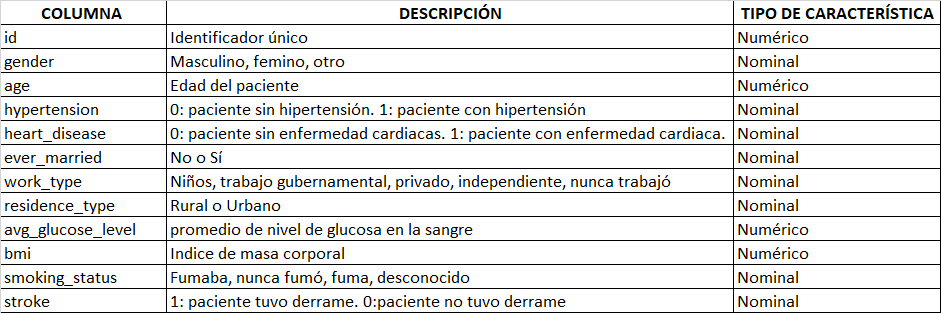

"unknown" en smoking status significa que no hay información disponible.

### Cargue de datos

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CodingDojo_DataScience/P2/opcion healthcare-dataset-stroke-data.xlsx')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['id'].nunique()

5110

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df['hypertension']=df['hypertension'].astype(object)
df['heart_disease']=df['heart_disease'].astype(object)

### Identifación valores faltantes.

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

201 datos faltantes en columna bmi (índice de masa corporal).

### Identificación filas duplicadas.

In [ ]:
df.duplicated().sum()

0

No hay filas duplicadas

### Columnas innecesarias:

Las columnas que no son útiles (inicialmente) para la realización de modelos son:

*   Id


In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Identificicaión de incosistencias en los datos.

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

No hay datos incosistentes.

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Data set desbalanceado.

### Incosistencias datos numéricos

In [ ]:
df.describe()

,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.854067,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.500000,0.000000
50%,45.000000,91.885000,28.100000,0.000000
75%,61.000000,114.090000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


In [ ]:
age=df['age']<1
age.sum()

43

No tiene sentido edades decimales, hay 43 valores menores que 1. Cambiaremos todos los valores a números enteros.

In [ ]:
df['age']=df['age'].astype(int)

In [ ]:
df['age'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

### Correlación

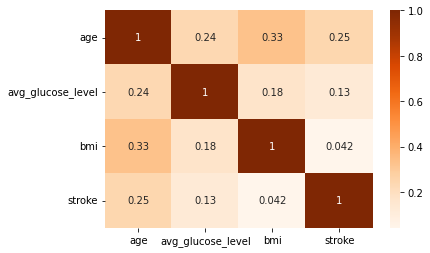

In [ ]:
correlacion=df.corr()
import seaborn as sns
sns.heatmap(correlacion, cmap = 'Oranges', annot=True)

No hay datos con correlación significativa.

### Manejos datos faltantes

Tenemos 201 datos faltantes en la columna de índice de masa corporal que representan el 3.93% del total de filas; sin embargo, en la columna "smoking_status" que hace referencia a si la persona ha fumado antes o no, hay 1544 (30.41% de los datos) con un estado desconocido, lo que puede significar un problema para la realización de modelos. Se procederá a hacer manejo de ambas columnas.

**'Unknown' en Smoking_status**

In [ ]:
unknown = (df['smoking_status']=="Unknown")
unknown.sum()

1544

Hay 1544 filas cuyo smoking_status es desconocido.

In [ ]:
filter_1 = ((df['smoking_status']=="Unknown") & (df['age']<12))
filter_1.sum()

521

521 de los 1544 pacientes con smoking_status desconocido son menores de 12 años. Según la NSDUH (National Survey on Drug Use an Health) en un informe del año 2020, en Estados Unidos hay personas que empiezan a fumar desde los 12 años por lo que basados en esta información el smoking status "unknown" de los paciendes menores de 12 años será cambiado por "never smoked".

Fuente: https://nsduhweb.rti.org/respweb/homepage.cfm

Informe: https://www.samhsa.gov/data/sites/default/files/reports/rpt35325/NSDUHFFRPDFWHTMLFiles2020/2020NSDUHFFR1PDFW102121.pdf#page=31&zoom=100,0,97

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df.loc[filter_1,'smoking_status'] = df.loc[filter_1,'smoking_status'].replace('Unknown', 'never smoked')

In [ ]:
df['smoking_status'].value_counts()

never smoked       2413
Unknown            1023
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Aún tenemos 1023 con valor desconocido en la columna 'smoking_status'. Por ahora se dejarán estos valores con 'Unknown' como una categoría.

**Valores faltantes en 'bmi'**

Los valores faltantes en la columna 'bmi' no son muchos considerando el total de los datos, por lo que serán imputados por el promedio de los mismos.

División conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
mean_imputer = SimpleImputer(strategy="mean")

In [ ]:
mean_imputer.fit(X_train[['bmi']])
X_train[['bmi']] = mean_imputer.transform(X_train[['bmi']])
X_test[['bmi']] = mean_imputer.transform(X_test[['bmi']])

In [ ]:
X_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

### Identificación valores atípicos y visualización valores numéricos.

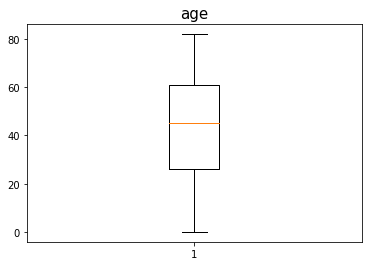

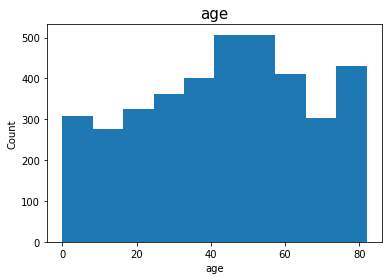

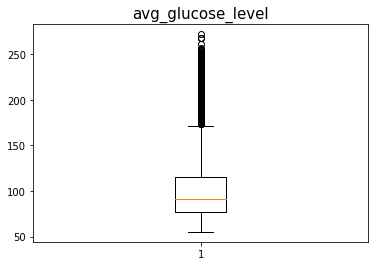

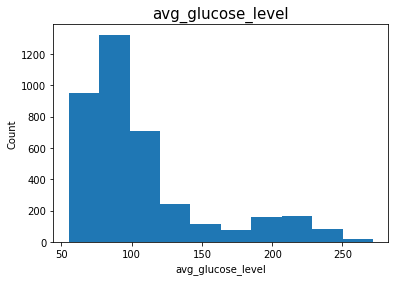

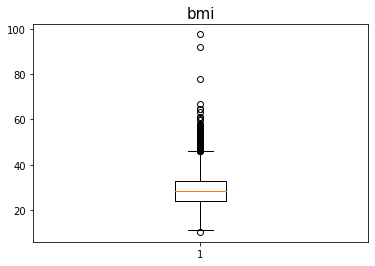

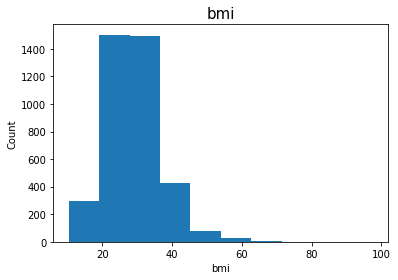

In [ ]:
columns = X_train.iloc[:,0:10].columns.tolist()
i=0
for y in columns:
  if X_train[y].dtype == 'float64' or X_train[y].dtype == 'int64' :
    plt.boxplot(X_train[y])
    plt.title(y, size=15)
    plt.show()
  if X_train[y].dtype == 'float64' or X_train[y].dtype == 'int64' :
    plt.hist(X_train[y])
    plt.title(y, size=15)
    plt.xlabel(y, size=10)
    plt.ylabel('Count')
    plt.show()

Existencia de datos atípicos en el indice de masa corporal y en el promedio de glucosa en la sangre.

### Visualización valores categóricos.

In [ ]:
grafica1=df['gender'].value_counts()
grafica2=df['ever_married'].value_counts()
grafica3=df['hypertension'].value_counts()
grafica4=df['heart_disease'].value_counts()
grafica4

0    4834
1     276
Name: heart_disease, dtype: int64

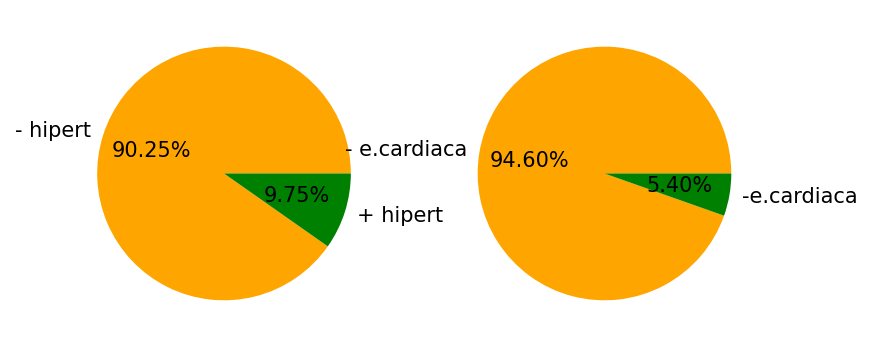

In [ ]:
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2) 

ax1.pie(grafica3, autopct='%.2f%%', labels=['- hipert','+ hipert'], colors=['orange','green'])
ax2.pie(grafica4, autopct='%.2f%%', labels=['- e.cardiaca','-e.cardiaca'], colors=['orange','green'])
plt.show()

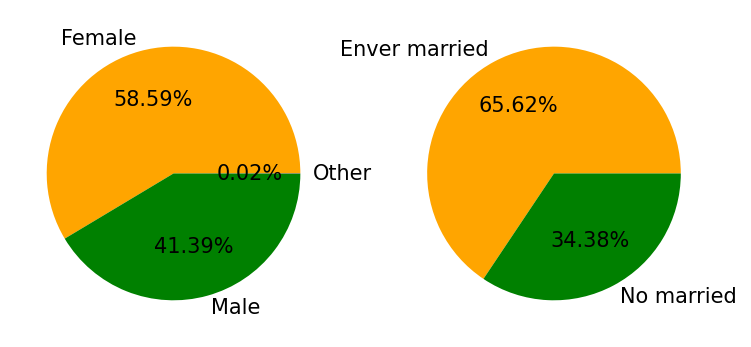

In [ ]:
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2) 

ax1.pie(grafica1, autopct='%.2f%%', labels=['Female','Male','Other'], colors=['orange','green','blue'])
ax2.pie(grafica2, autopct='%.2f%%', labels=['Enver married','No married'], colors=['orange','green'])
plt.show()

## Modelos

## Escalamiento, transformación

In [ ]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 4505 to 860
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3832 non-null   object 
 1   age                3832 non-null   int64  
 2   hypertension       3832 non-null   object 
 3   heart_disease      3832 non-null   object 
 4   ever_married       3832 non-null   object 
 5   work_type          3832 non-null   object 
 6   Residence_type     3832 non-null   object 
 7   avg_glucose_level  3832 non-null   float64
 8   bmi                3832 non-null   float64
 9   smoking_status     3832 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 329.3+ KB


In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
cat_tuple = (scaler, num_selector)
num_tuple = (ohe, cat_selector)
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [ ]:
col_transformer.fit(X_train)
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train_processed)
X_test_df = pd.DataFrame(X_test_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.737032,2.823301,1.926307,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.105978,-0.489814,-0.050820,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.382080,-0.411899,0.209329,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.515187,-0.941012,-0.141871,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.515187,0.109289,1.406011,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Árboles de clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.fit(X_train_df, y_train)
dec_tree.get_depth()

17

In [ ]:
dt_predict_train = dec_tree.predict(X_train_df)
dt_predict_test = dec_tree.predict(X_test_df)
dt_train_score = dec_tree.score(X_train_df, y_train)
dt_test_score = dec_tree.score(X_test_df, y_test)
print(dt_train_score)
print(dt_test_score)

1.0
0.9014084507042254


In [ ]:
max_depths = range(2,18)
train_score_dt = []
test_score_dt = []

for depth in max_depths:
  dec_tree1 = DecisionTreeClassifier(random_state = 42, max_depth=depth)
  dec_tree1.fit(X_train_df, y_train)
  dt1_predict_train = dec_tree1.predict(X_train_df)
  dt1_predict_test = dec_tree1.predict(X_test_df)
  dt1_train_score = dec_tree1.score(X_train_df, y_train)
  dt1_test_score = dec_tree1.score(X_test_df, y_test)
  train_score_dt.append(dt1_train_score)
  test_score_dt.append(dt1_test_score)
  print('Max Depth: ',depth,' Train socre: ', dt1_train_score,' Test score: ', dt1_test_score)

Max Depth:  2  Train socre:  0.9558977035490606  Test score:  0.9374021909233177
Max Depth:  3  Train socre:  0.9561586638830898  Test score:  0.9381846635367762
Max Depth:  4  Train socre:  0.9577244258872651  Test score:  0.9358372456964006
Max Depth:  5  Train socre:  0.9613778705636743  Test score:  0.9295774647887324
Max Depth:  6  Train socre:  0.9632045929018789  Test score:  0.9256651017214398
Max Depth:  7  Train socre:  0.9668580375782881  Test score:  0.9248826291079812
Max Depth:  8  Train socre:  0.9718162839248434  Test score:  0.9194053208137715
Max Depth:  9  Train socre:  0.9775574112734864  Test score:  0.9194053208137715
Max Depth:  10  Train socre:  0.9835594989561587  Test score:  0.9100156494522692
Max Depth:  11  Train socre:  0.9900835073068893  Test score:  0.9021909233176839
Max Depth:  12  Train socre:  0.9945198329853863  Test score:  0.9014084507042254
Max Depth:  13  Train socre:  0.9966075156576201  Test score:  0.8967136150234741
Max Depth:  14  Train so

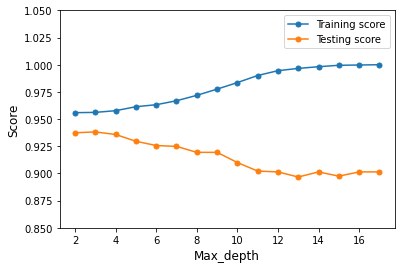

In [ ]:
plt.plot(max_depths, train_score_dt, marker='.',markersize=10)
plt.plot(max_depths, test_score_dt, marker='.',markersize=10)
plt.ylim(bottom=0.85,top=1.05)
plt.xlabel('Max_depth',size=12)
plt.ylabel('Score',size=12)
plt.legend(['Training score','Testing score'])
plt.show()

Mejor test score, max_depth= 3.

In [ ]:
dec_tree3 = DecisionTreeClassifier(random_state = 42, max_depth=3)
dec_tree3.fit(X_train_df, y_train)
dt3_predict_train = dec_tree3.predict(X_train_df)
dt3_predict_test = dec_tree3.predict(X_test_df)
dt3_train_score = dec_tree3.score(X_train_df, y_train)
dt3_test_score = dec_tree3.score(X_test_df, y_test)
print(dt3_train_score)
print(dt3_test_score)

0.9561586638830898
0.9381846635367762


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
accuracy_dt3 = accuracy_score(y_test, dt3_predict_test)
recall_dt3 = recall_score(y_test, dt3_predict_test)
precision_dt3 = precision_score(y_test, dt3_predict_test)
f1_dt3 = f1_score(y_test, dt3_predict_test)
print('accuracy: ',accuracy_dt3, ' recall: ',recall_dt3,' precision: ', precision_dt3, ' f1: ',f1_dt3)

accuracy:  0.9381846635367762  recall:  0.0375  precision:  0.6  f1:  0.07058823529411765


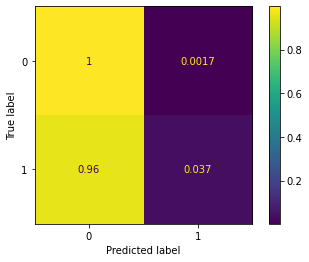

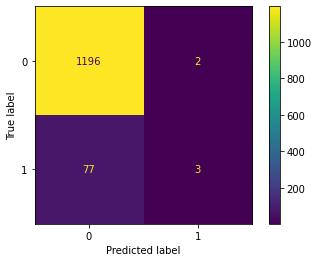

In [ ]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, dt3_predict_test)
dt_cm_disp = ConfusionMatrixDisplay(dt_cm)
ConfusionMatrixDisplay.from_estimator(dec_tree3, X_test_df, y_test, normalize = 'true')
dt_cm_disp.plot()
plt.show()

### K vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = range(1,12)
train_score_knn = []
test_score_knn = []

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_df, y_train)
  knn_predict_train = knn.predict(X_train_df)
  knn_predict_test = knn.predict(X_test_df)
  knn_train_score = knn.score(X_train_df, y_train)
  knn_test_score = knn.score(X_test_df, y_test)
  train_score_knn.append(knn_train_score)
  test_score_knn.append(knn_test_score)
  print('# de vecinos: ',n,' Train score: ', knn_train_score,' Test score', knn_test_score)

# de vecinos:  1  Train score:  1.0  Test score 0.917057902973396
# de vecinos:  2  Train score:  0.9595511482254697  Test score 0.9327073552425665
# de vecinos:  3  Train score:  0.9582463465553236  Test score 0.9287949921752738
# de vecinos:  4  Train score:  0.9569415448851775  Test score 0.9374021909233177
# de vecinos:  5  Train score:  0.9572025052192067  Test score 0.9366197183098591
# de vecinos:  6  Train score:  0.9566805845511482  Test score 0.9374021909233177
# de vecinos:  7  Train score:  0.9566805845511482  Test score 0.9358372456964006
# de vecinos:  8  Train score:  0.9561586638830898  Test score 0.9374021909233177
# de vecinos:  9  Train score:  0.9556367432150313  Test score 0.9374021909233177
# de vecinos:  10  Train score:  0.9558977035490606  Test score 0.9374021909233177
# de vecinos:  11  Train score:  0.9558977035490606  Test score 0.9374021909233177


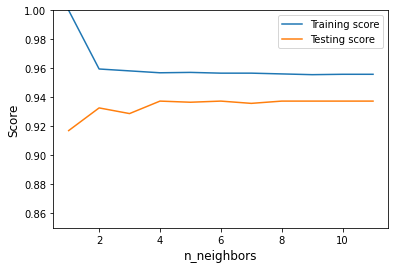

In [ ]:
plt.plot(neighbors, train_score_knn)
plt.plot(neighbors, test_score_knn)
plt.ylim(bottom=0.85,top=1)
plt.xlabel('n_neighbors',size=12)
plt.ylabel('Score',size=12)
plt.legend(['Training score','Testing score'])
plt.show()

mejor n_neighbors = 4

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train_df, y_train)
knn4_train = knn4.predict(X_train_df)
knn4_predict_test = knn4.predict(X_test_df)
knn4_train_score = knn4.score(X_train_df, y_train)
knn4_test_score = knn4.score(X_test_df, y_test)
print(knn4_train_score)
print(knn4_test_score)

0.9569415448851775
0.9374021909233177


In [ ]:
accuracy_knn = accuracy_score(y_test, knn4_predict_test)
recall_knn = recall_score(y_test, knn4_predict_test)
precision_knn = precision_score(y_test, knn4_predict_test)
f1_knn = f1_score(y_test, knn4_predict_test)
print('accuracy: ',accuracy_knn, ' recall: ',recall_knn,' precision: ', precision_knn,' f1: ',f1_knn)
#Error porque hay una división por 0.

accuracy:  0.9374021909233177  recall:  0.0  precision:  0.0  f1:  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


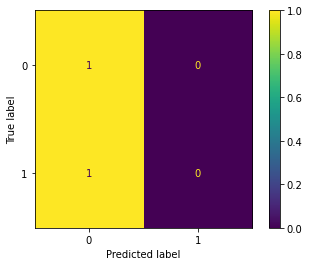

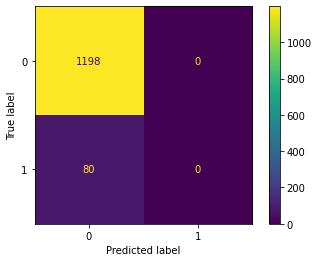

In [ ]:
knn_cm = confusion_matrix(y_test, knn4_predict_test)
knn_cm_disp = ConfusionMatrixDisplay(knn_cm)
ConfusionMatrixDisplay.from_estimator(knn4, X_test_df, y_test, normalize = 'true')
knn_cm_disp.plot()
plt.show()

### Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_df, y_train)
lr_predict_train = lr.predict(X_train_df)
lr_predict_test = lr.predict(X_test_df)
lr_train_score = lr.score(X_train_df, y_train)
lr_test_score = lr.score(X_test_df, y_test)
print(lr_train_score, lr_test_score)

0.9558977035490606 0.9381846635367762


In [ ]:
accuracy_lr = accuracy_score(y_test, lr_predict_test)
recall_lr = recall_score(y_test, lr_predict_test)
precision_lr = precision_score(y_test, lr_predict_test)
f1_lr = f1_score(y_test, lr_predict_test)
print('accuracy: ',accuracy_lr, ' recall: ',recall_lr,' precision: ', precision_lr, ' f1: ',f1_lr)

accuracy:  0.9381846635367762  recall:  0.0125  precision:  1.0  f1:  0.02469135802469136


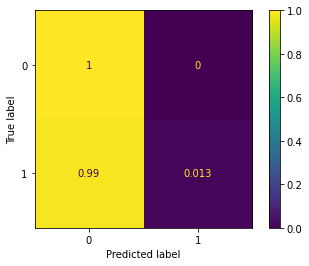

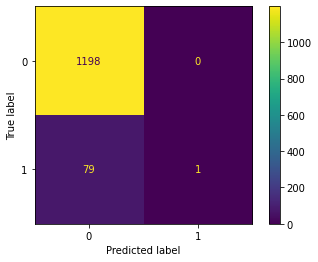

In [ ]:
lr_cm = confusion_matrix(y_test, lr_predict_test)
lr_cm_disp = ConfusionMatrixDisplay(lr_cm)
ConfusionMatrixDisplay.from_estimator(lr, X_test_df, y_test, normalize = 'true')
lr_cm_disp.plot()
plt.show()

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_lr1 = []
test_score_lr1 = []

for c in c_values:
  log_reg1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg1.fit(X_train_df, y_train)
  lr1_train_score = log_reg1.score(X_train_df, y_train)
  lr1_test_score = log_reg1.score(X_test_df, y_test)
  train_score_lr1.append(lr1_train_score)
  test_score_lr1.append(lr1_test_score)
  
  print('c: ',c,' Train score: ', lr1_train_score,' Test score', lr1_test_score)

c:  0.0001  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  0.001  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  0.01  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  0.1  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  1  Train score:  0.9558977035490606  Test score 0.9381846635367762
c:  10  Train score:  0.9558977035490606  Test score 0.9381846635367762
c:  100  Train score:  0.9558977035490606  Test score 0.9381846635367762
c:  1000  Train score:  0.9558977035490606  Test score 0.9381846635367762


In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_lr2 = []
test_score_lr2 = []

for c in c_values:
  log_reg2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg2.fit(X_train_df, y_train)
  lr2_train_score = log_reg2.score(X_train_df, y_train)
  lr2_test_score = log_reg2.score(X_test_df, y_test)
  train_score_lr2.append(lr2_train_score)
  test_score_lr2.append(lr2_test_score)
  
  print('c: ',c,' Train score: ', lr2_train_score,' Test score', lr2_test_score)

c:  0.0001  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  0.001  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  0.01  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  0.1  Train score:  0.9558977035490606  Test score 0.9374021909233177
c:  1  Train score:  0.9558977035490606  Test score 0.9381846635367762
c:  10  Train score:  0.9558977035490606  Test score 0.9381846635367762
c:  100  Train score:  0.9558977035490606  Test score 0.9381846635367762
c:  1000  Train score:  0.9558977035490606  Test score 0.9381846635367762


Con la afinación de los hiperparametros nada cambia.

### Bagged Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagreg = BaggingClassifier(random_state = 42)
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bagreg.fit(X_train_df, y_train)
bagreg_predict_train = bagreg.predict(X_train_df)
bagreg_predict_test = bagreg.predict(X_test_df)
bagreg_train_score = bagreg.score(X_train_df, y_train)
bagreg_test_score = bagreg.score(X_test_df, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9926931106471816
0.935054773082942


In [ ]:
estimators = (10,30,50,70,100,120,150)
train_score_bt = []
test_score_bt = []

for e in estimators:
  bt1 = BaggingClassifier(random_state = 42, n_estimators=e)
  bt1.fit(X_train_df, y_train)
  bt1_predict_train = bt1.predict(X_train_df)
  bt1_predict_test = bt1.predict(X_test_df)
  bt1_train_score = bt1.score(X_train_df, y_train)
  bt1_test_score = bt1.score(X_test_df, y_test)
  train_score_bt.append(bt1_train_score)
  test_score_bt.append(bt1_test_score)
  print('Estimators: ',e,' Train socre: ', bt1_train_score,' Test score: ', bt1_test_score)

Estimators:  10  Train socre:  0.9926931106471816  Test score:  0.935054773082942
Estimators:  30  Train socre:  0.9979123173277662  Test score:  0.9381846635367762
Estimators:  50  Train socre:  1.0  Test score:  0.9381846635367762
Estimators:  70  Train socre:  0.9997390396659708  Test score:  0.9366197183098591
Estimators:  100  Train socre:  1.0  Test score:  0.9366197183098591
Estimators:  120  Train socre:  1.0  Test score:  0.9366197183098591
Estimators:  150  Train socre:  1.0  Test score:  0.9374021909233177


Mejor test score, n estimators= 50.

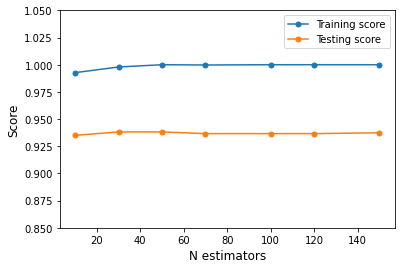

In [ ]:
plt.plot(estimators, train_score_bt, marker='.',markersize=10)
plt.plot(estimators, test_score_bt, marker='.',markersize=10)
plt.ylim(bottom=0.85,top=1.05)
plt.xlabel('N estimators',size=12)
plt.ylabel('Score',size=12)
plt.legend(['Training score','Testing score'])
plt.show()

In [ ]:
bt50 = BaggingClassifier(random_state = 42, n_estimators=50)
bt50.fit(X_train_df, y_train)
bt50_predict_train = bt50.predict(X_train_df)
bt50_predict_test = bt50.predict(X_test_df)
bt50_train_score = bt50.score(X_train_df, y_train)
bt50_test_score = bt50.score(X_test_df, y_test)
print(bt50_train_score)
print(bt50_test_score)

1.0
0.9381846635367762


In [ ]:
accuracy_bt50 = accuracy_score(y_test, bt50_predict_test)
recall_bt50 = recall_score(y_test, bt50_predict_test)
precision_bt50 = precision_score(y_test, bt50_predict_test)
f1_bt50 = f1_score(y_test, bt50_predict_test)
print('accuracy: ',accuracy_bt50, ' recall: ',recall_bt50,' precision: ', precision_bt50, ' f1: ',f1_bt50)

accuracy:  0.9381846635367762  recall:  0.025  precision:  0.6666666666666666  f1:  0.04819277108433735


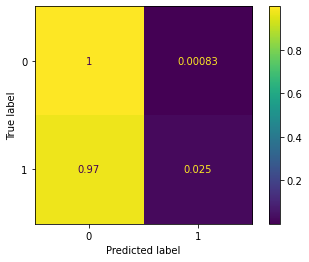

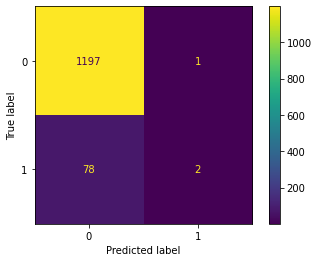

In [ ]:
bt_cm = confusion_matrix(y_test, bt50_predict_test)
bt_cm_disp = ConfusionMatrixDisplay(bt_cm)
ConfusionMatrixDisplay.from_estimator(bt50, X_test_df, y_test, normalize = 'true')
bt_cm_disp.plot()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train_df, y_train)
rf_predict_train = rf.predict(X_train_df)
rf_predict_test = rf.predict(X_test_df)
rf_train_score = rf.score(X_train_df, y_train)
rf_test_score = rf.score(X_test_df, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.9374021909233177


In [ ]:
estimators_rf = (10,30,50,70,100,120,150)
train_score_rf = []
test_score_rf = []

for e_rf in estimators_rf:
  rf1 = RandomForestClassifier(random_state = 42, n_estimators=e_rf)
  rf1.fit(X_train_df, y_train)
  rf1_predict_train = rf1.predict(X_train_df)
  rf1_predict_test = rf1.predict(X_test_df)
  rf1_train_score = rf1.score(X_train_df, y_train)
  rf1_test_score = rf1.score(X_test_df, y_test)
  train_score_rf.append(rf1_train_score)
  test_score_rf.append(rf1_test_score)
  print('Estimators: ',e_rf,' Train socre: ', rf1_train_score,' Test score: ', rf1_test_score)

Estimators:  10  Train socre:  0.9926931106471816  Test score:  0.935054773082942
Estimators:  30  Train socre:  0.9979123173277662  Test score:  0.9374021909233177
Estimators:  50  Train socre:  0.9997390396659708  Test score:  0.9374021909233177
Estimators:  70  Train socre:  1.0  Test score:  0.9374021909233177
Estimators:  100  Train socre:  1.0  Test score:  0.9374021909233177
Estimators:  120  Train socre:  1.0  Test score:  0.9381846635367762
Estimators:  150  Train socre:  1.0  Test score:  0.9381846635367762


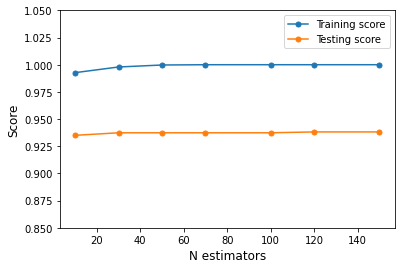

In [ ]:
plt.plot(estimators_rf, train_score_rf, marker='.',markersize=10)
plt.plot(estimators_rf, test_score_rf, marker='.',markersize=10)
plt.ylim(bottom=0.85,top=1.05)
plt.xlabel('N estimators',size=12)
plt.ylabel('Score',size=12)
plt.legend(['Training score','Testing score'])
plt.show()

Mejor test score, n estimators= 120

In [ ]:
rf120 = RandomForestClassifier(random_state = 42, n_estimators=120)
rf120.fit(X_train_df, y_train)
rf120_predict_train = rf120.predict(X_train_df)
rf120_predict_test = rf120.predict(X_test_df)
rf120_train_score = rf120.score(X_train_df, y_train)
rf120_test_score = rf120.score(X_test_df, y_test)
print(rf120_train_score)
print(rf120_test_score)

1.0
0.9381846635367762


In [ ]:
accuracy_rf120 = accuracy_score(y_test, rf120_predict_test)
recall_rf120 = recall_score(y_test, rf120_predict_test)
precision_rf120 = precision_score(y_test, rf120_predict_test)
f1_rf120 = f1_score(y_test, rf120_predict_test)
print('accuracy: ',accuracy_rf120, ' recall: ',recall_rf120,' precision: ', precision_rf120, ' f1: ',f1_rf120)

accuracy:  0.9381846635367762  recall:  0.025  precision:  0.6666666666666666  f1:  0.04819277108433735


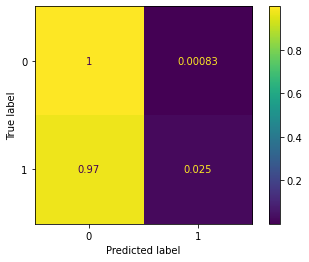

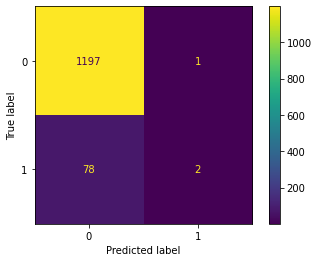

In [ ]:
rf_cm = confusion_matrix(y_test, rf120_predict_test)
rf_cm_disp = ConfusionMatrixDisplay(rf_cm)
ConfusionMatrixDisplay.from_estimator(rf120, X_test_df, y_test, normalize = 'true')
rf_cm_disp.plot()
plt.show()

### Neuronal Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
input_shape = X_train_df.shape[1]
input_shape

22

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(22, input_dim = input_shape, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'bce', optimizer = 'adam', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_df, y_train,
                    validation_data = (X_test_df, y_test), 
                    epochs=10)

Epoch 1/10
120/120 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8891 - val_loss: 0.2198 - val_accuracy: 0.9374
Epoch 2/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9559 - val_loss: 0.2035 - val_accuracy: 0.9374
Epoch 3/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9559 - val_loss: 0.2009 - val_accuracy: 0.9374
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9559 - val_loss: 0.1960 - val_accuracy: 0.9374
Epoch 5/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9559 - val_loss: 0.1933 - val_accuracy: 0.9374
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9559 - val_loss: 0.1946 - val_accuracy: 0.9374
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9559 - val_loss: 0.1917 - val_accuracy: 0.9374
Epoch 

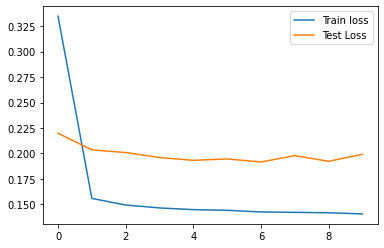

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

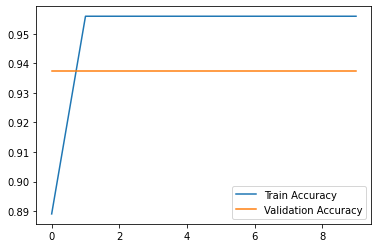

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

### Resumen de métricas y conclusión

In [ ]:
model_df = pd.DataFrame()
model_df['Models'] = ['Decision tree', 'KNN', 'Logistic regression', 'Bagged trees', 'Random Forest']
model_df['Accuracy'] = [accuracy_dt3, accuracy_knn, accuracy_lr, accuracy_bt50, accuracy_rf120]
model_df['Recall'] = [recall_dt3, recall_knn, recall_lr, recall_bt50, recall_rf120]
model_df['Precision'] = [precision_dt3, precision_knn, precision_lr, precision_bt50, precision_rf120]
model_df['f1'] = [f1_dt3, f1_knn, f1_lr, f1_bt50, f1_rf120]
model_df

,Models,Accuracy,Recall,Precision,f1
0,Decision tree,0.938185,0.0375,0.600000,0.070588
1,KNN,0.937402,0.0000,0.000000,0.000000
2,Logistic regression,0.938185,0.0125,1.000000,0.024691
3,Bagged trees,0.938185,0.0250,0.666667,0.048193
4,Random Forest,0.938185,0.0250,0.666667,0.048193


En todos los modelos la métrica 'recall' es bastante ineficiente, lo que
quiere decir que todos los modelos tienen problemas para predecir los
verdaderos positivos (pacientes que efectivamente tuvieron un
derrame), esto debido a que el dataset está bastante desbalanceado,
lo que hace que la métrica 'accuracy' sea engañosa.

'Mejor' modelo considerando lo anterior: árbol de decisión de clasificación.